In [7]:
from sklearn import datasets
import numpy as np

C:\Users\ai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래스 레이블 : ', np.unique(y))

클래스 레이블 :  [0 1 2]


In [9]:
print(X.shape)
print(y)

(150, 2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* 사이킷런의 많은 함수와 클래스 메서드는 문자열 형태의 클래스 레이블을 다룰 수 있다.
* 정수 레이블이 권장되는 이유는 사소한 실수를 피할 수 있고 작은 메모리 영역을 차지하므로 계산 성능을 향상시키기 때문
* 클래스 레이블을 정수로 인코딩하는 것은 대부분 머신 러닝 라이브러리의 공통된 관례

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

* train_test_split 함수가 분할하기 전 미리 데이터셋을 섞음, 순차적으로 들어가면 제대로 분류가 안됨
* 무작위로 섞기위해 random_state로 시드 고정
* stratify=y를 통해 계층화 기능 사용, 계층화는 train_test_split 함수가 훈련셋과 테스트셋 클래스 레이블 비율을 입력 데이터셋과 동일하게 맞추는거

### 머신러닝 알고리즘과 최적화 알고리즘은 최상의 성능을 위해 특성 스케일 조정이 필요함.
* 사이킷런의 preprocessing 모듈의 StandardScalar 클래스 사용하여 특성 표준화

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
#sc.fit(X_test)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

* preprocessing 모듈에서 StandardScaler 클래스를 로드하고 새로운 StandardScaler 객체를 sc 변수에 할당
* StandardScaler의 fit 메서드는 훈련 세트의 각 특성 차원마다 mu, sigma 계산
* transform 메서드를 호출하면 계산된 mu 와 sigma를 사용하여 훈련세트를 표준화함
* 훈련세트와 테스트세트의 샘플이 서로 같은 비율로 이동되도록 동일한 mu와 sigma를 사용하여 테스트 세트를 표준화

* 훈련세트를 표준화 한 후 퍼셉트론 모델 훈련, 사이킷런 알고리즘은 대부분 기본적으로 OvR(One-versus-Rest) 방식을 사용하여 다중분류를 지원
* 세개의 붓꽃 클래스를 퍼셉트론에 한번에주입

In [13]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

* linear_model 모듈에서 Perceptron 클래스를 로드하고 새로운 Perceptron 객체를 생성한 후 fit 메서드를 사용하여 모델 훈련
* 모델 매개변수 eta0는 학습률, max_iter 매개변수는 훈련 세트를 반복할 에포크 횟수를 정의
* 에포크마다 훈련 세트를 섞은 결과가 나중에 그대로 재현되도록 random_state 변수 사용
* 모델을 훈련하고 예측 가능

In [14]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수 : %d' %(y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 1


In [15]:
from sklearn.metrics import accuracy_score
print('정확도 : %.2f' %accuracy_score(y_test, y_pred))

정확도 : 0.98


# 시각화(잘 분류했는지)

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [17]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl,
                    edgecolors='black')
        
    # 테스트 샘플 부각해서 그림
    if test_idx:
        X_test, y_test, X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], 
                    X_test[:, 1],
                    c='', 
                    edgecolors='black', 
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100, 
                    label='test set')

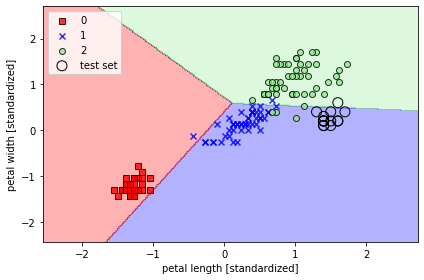

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 퍼셉트론은 클래스가 선형적으로 구분되지 않을때 수렴 X
* 로지스틱회귀는 구현하기 매우 쉽고 선형적으로 구분되는 클래스에 뛰어난 성능을 내는 분류 모델

#### 오즈비, 시그모이드
* 오즈는 특정 이벤트가 발생할 확률, P/(1-P), 여기서 P는 양성 샘플(예측 대상)일 확률 (ex)환자가 어떤 질병을 가지고 있을 확률
* 오즈비에 로그함수(로그 오즈)를 취해 로짓 함수를 정의함
* logit(P) = log(P/(1-P)), 여기서 log는 자연로그. logit 함수는 0과 1사이의 입력값을 받아 실수값으로 변환함
* 특성의 가중치 합과 로그 오즈 사이의 선형 관계를 다음과 같의 정의
* logit(P(y=1|x)) = w0x0 + ... + wmxm = 시그마i=0부터 m까지 wixi = w^Tx
* p(y=1|x)는 특성 x가 주어졌을때 샘플이 클래스 1에 속할 확률
* 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것이 관심대상이므로 logit 함수를 거꾸로 뒤집음. 이를 로지스틱 시그모이드라 함
* 함수모양이 S자 형태를 띠어 간단히 시그모이드 함수라고도 함. z=w^Tx = w0x0 + ,,, + wmxm
* w0는 절편을 의미함. 이를 위해 값이 1인 입력 x0를 추가

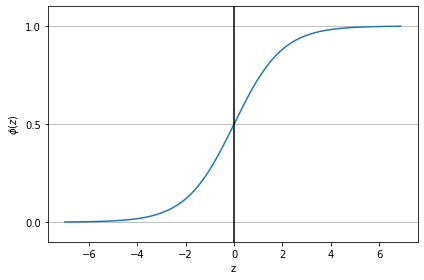

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# 사이킷 런 로지스틱 회귀모델 훈련
* 다중분류도 지원함 (OvR이 기본값)

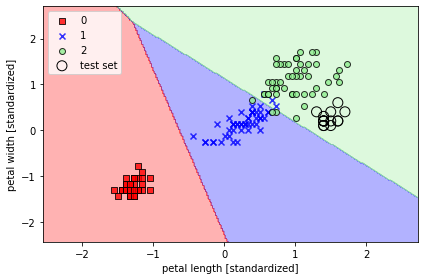

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* 훈련샘플이 어떤 클래스에 속할 확률은 predict_proba 메서드를 사용하여 계산함. ex, 테스트 세트에 있는 처음 세개의 샘플 확률은 다음과 같이 예측 가능

In [28]:
lr.predict_proba(X_train_std[:3,:])

array([[8.18726653e-01, 1.81273347e-01, 2.20136928e-13],
       [7.69895780e-01, 2.30104220e-01, 1.01831325e-12],
       [4.41908560e-08, 1.31518361e-01, 8.68481595e-01]])

In [29]:
lr.predict_proba(X_train_std[:3,:]).argmax(axis=1)

array([0, 0, 2], dtype=int64)

### 규제를 사용하여 오버피팅 피하기
* 오버피팅은 ml에서 자주 발생하는 문제. 과소적합 -> 높은 편향, 과대적합 -> 높은 분산
* 분산은 모델을 여러 번 훈련했을 때 특정 샘플에 대한 예측의 일관성(변동성)을 측정함. (ex) 훈련 데이터 셋의 일부분을 사용하여 여러번 훈련하는 경우
* 편향은 다른 훈련 데이터셋에서 여러번 훈련했을때 예측이 정확한 값에서 얼마나 벗어났는지 측정함. 편향은 무작위성이 아니라 구조적인 에러를 나타냄

* 좋은 편향 - 분산 트레이드오프를 찾는 한가지 방법은 규제를 사용하여 모델의 복잡도를 조정하는 것
* 규제는 공선성을 다루거나 데이터에서 잡음을 제거하여 과대적합을 방지할 수 있는 매우 유용한 방법
* 규제는 과도한 파라미터(가중치)값을 제한하기 위해 추가적인 정보(편향)를 주입하는 개념.
* 가장 널리 사용하는 규제형태는 L2규제(L2축소 또는 가중치 감소라고 부름)

* 로지스틱 회귀의 비용 함수는 규제 항을 추가해서 규제를 적용함. 규제 항은 모델 훈련과정에서 가중치를 줄이는 역할을 함..
* 사이킷런 LogisticRegression 클래스의 매개변수 C는 L2의 규제 하이퍼파라미터 람다의 역수.
* C값을 감소시키면 규제 강도가 증가함.

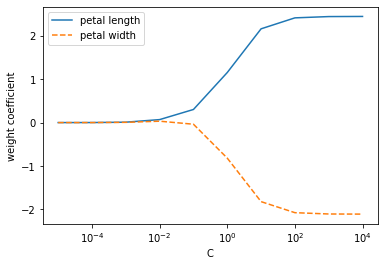

In [33]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

* 역 규제 매개변수 C의 값을 바꾸면서 열 개의 로지스틱 회귀 모델을 훈련함. 시연을 위해 모든 분류기에서 클래스 1의 가중치 값만 사용, 다중분류에는 OvR 기법 사용
* 매개변수 C가 감소하면 가중치 절댓값이 줄어듬. 즉, 규제 강도가 증가함

# 서포트 벡터 머신
* svm은 강력하고 널리 사용되는 학습 알고리즘으로, 퍼셉트론의 확장
* 앞서서 퍼셉트론 알고리즘을 사용하여 분류 오차를 최소화함. svm의 최적화 대상은 마진을 최대화 하는 것.
* 마진은 클래스를 구분하는 초평면(결정경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의함.
* 마진을 크게 하고 싶은 이유는 일반화 오차가 낮아지는 경향이 있기 때문, 마진이 낮아지면 오버피팅 되기 쉽다.

### 슬랙 변수를 사용하여 비선형 분류 문제 다루기
* 슬랙변수가 있는 경우를 소프트 마진 분류, 없는 경우를 하드 마진 분류라고 함
* 슬랙 변수는 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입됨. 이를 통해 적절히 비용을 손해 보면서 분류 오차가 있는 상황에서 최적화 알고리즘이 수렴함.
* 양수 값인 슬랙 변수를 선형 제약 조건에 더함
* 변수 C를 통해 분류 오차에 대한 비용을 조정할 수 있음. C 값이 크면 오차에 대한 비용이 커지고, C 값이 작으면 분류 오차에 덜 엄격해짐
* 매개변수 C를 사용하여 마진 폭을 제어할 수 있고, 편향 - 분산의 트레이드 오프 조정

* 위 개념은 규제와 관련 있음. 로지스틱 회귀 모델은 C 값을 줄이면 편향이 늘고 모델 분산이 줄어듬.

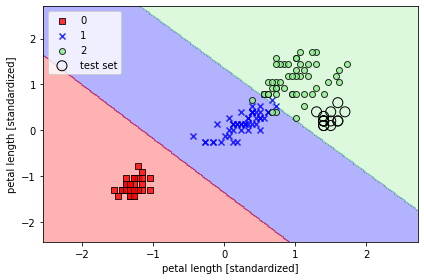

In [38]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* 실제 분류 작업에서 선형 로지스틱 회귀와 선형 SVM은 매우 비슷한 결과를 만듬. 
* 로지스틱 회귀는 훈련 데이터의 conditional likelihood를 최대화 하기 때문에 SVM보다 이상치에 민감함.
* SVM은 결정 경계에 가장 가까운 포인트에 대부분의 관심을 둠
* 로지스틱 회귀는 모델이 간단하고 더 쉬운 장점이 있고, 업데이트가 용이해 스트리밍 데이터를 다룰 때 적합함

### 사이킷 런의 다른 구현
* 사이킷런에서는 선형 SVm 모델을 위해 LIBLINEAR 라이브러리를 사용하는 분류를 위한 linearSVC와 회귀를 위한 linearSVR 클래스를 제공함.
* 선형 SVM 문제에서는 'linear' 커널을 사용하는 SVC, SVR보다 빠름

* 이따금 데이터가 너무 커 컴퓨터 메모리 용량에 맞지 않는 경우가 있음.
* 사이킷런은 이에 대한 대응으로 SGDClassifier 클래스를 제공함. 이 클래스는 partial_fit 메서드를 사용하여 온라인 학습을 지원함.
* SGDClassifier 클래스 이면에 있는 개념은 2장에서 아달린을 위해 구현한 확률적 경사 하강법과 비슷
* 기본 매개변수를 사용한 퍼셉트론, 로지스틱 회귀, 서포트 벡터 머신의 확률적 경사 하강법 버전은 다음과 같음

In [40]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# 커널 SVM을 사용하여 비선형 문제 풀기 

* SVM이 인기가 높은 또 다른 이유는 비선형 분류 문제를 풀기 위해 커널 방법을 사용할 수 있기 때문
* 커널 SVM(kernel SVM)의 주요 개념을 설명하기 전에 먼저 비선형 분류 문제가 어떤 모습인지 보기 위해 샘플 데이터셋을 만듬

### 선형적으로 구분되지 않는 데이터를 위한 커널 방법
* 넘파이 logical_or 함수를 사용하여 XOR 형태의 간단한 데이터 셋을 만듬.
* 대략 100개 샘플은 클래스 레이블 1로 할당, 나머지 100개 샘플은 클래스 레이블 -1로 할당

In [51]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                      X_xor[:, 1] > 0)

y_xor = np.where(y_xor, 1, -1)

In [52]:
print(y_xor)

[ 1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1
 -1  1 -1  1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1
  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1
 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1
  1 -1 -1  1  1  1  1  1]


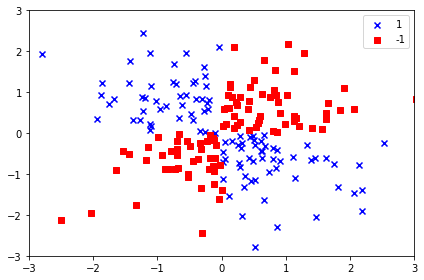

In [57]:
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* 이렇듯 선형적으로 구분되지 않는 데이터를 다루는 커널 방법의 기본 아이디어는 매핑함수(Φ)를 사용하는 것
* 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영함. 2차원 데이터 셋 -> 3차원 특성 공간으로 변환함

### 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기
* SVM으로 비선형 문제를 풀기 위해 매핑함수 Φ를 사용하여 훈련데이터를 고차원 특성 공간으로 변환함.
* 그 다음 새로은 특성 공간에서 데이터를 분류하는 선형 SVM 모델을 훈련함.
* 동일한 매핑함수를 사용하여 새로운 본 적 없는 데이터를 변환하고 선형 SVM 모델을 사용하여 분류할 수 있음
* but, 계산 비용이 매우 비쌈. 특히 고차원 데이터일때 더욱 그럼.
* 여기에 소위 커널기법이 등장함
* 점곱 x^(i)T * x^(j)를 Φ(x^(i))^T * Φ(x^(j))로 바꿈. 두 포인트 사이 점곱을 계산하는데 드는 높은 비용을 절감하기 위해 커널함수를 정의함
* 가장 널리 사용되는 커널 중 하나는 Radial Basis Function, RBF. 방사 기저 함수. 가우시안 커널(Gaussian kernel)이라고도 함.

* 감마(1/2σ^2)는 최적화 대상이 아님
* 커널이란 용어를 샘플 간의 유사도 함수(similarity function)로 해석할 수 있음
* 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할을 함
* 지수 함수로 얻게되는 유사도 점수는 1(매우 비슷한 샘플)과 0(매우 다른 샘플) 사이 범위를 가짐
* 앞서 임포트한 사이킷런의 SVC 클래스를 사용하고 매개변수 kernel = 'linear'를 kernel='rbf'로 변경

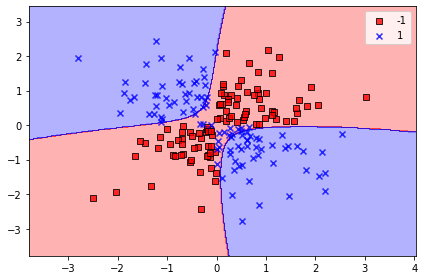

In [73]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* gamma = 0.1로 지정한 매개변수 감마(1/2σ^2)를 가우시안 구(Gaussian sphere)의 크기를 제한하는 매개변수로 이해할 수 있음.
* 감마 값을 크게하면 서포트 벡터의 영향이나 범위가 줄어듬
* 결정 경계는 더욱 샘플에 가까워지고 구불구불해짐.

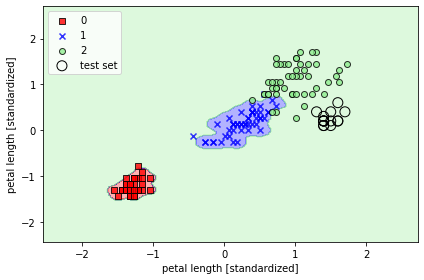

In [79]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma=100, C=1) # 감마 값 변경
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* 이런 분류기는 훈련 데이터에서는 잘 맞지만 본 적없는 데이터에서는 일반화 오차가 높음. 따라서 감마 매개변수가 오버피팅을 조절하는 중요한 역할
* SVM 모델에 규제를 가할때는 gamma와 C 매개변수를 동시에 조절할 것

# 결정 트리 학습
* 결정 트리 분류기는 설명이 중요할 때 아주 유용함.
* 결정 트리라는 이름처럼 일련의 질문에 대한 결정을 통해 데이터를 분해하는 모델로 생각할 수 있음


* 결정 트리는 훈련 데이터에 있는 특성을 기반으로 샘플의 클래스 레이블을 추정할 수 있는 일련의 질문을 학습함
* 결정 알고리즘을 사용하면 트리의 루트에서 시작해서 정보 이득(Information Gain, IG)이 최대가 되는 특성으로 데이터를 나눔
* 반복과정을 통해 리프 노드가 순수해질 때까지 모든 자식 노드에서 이 분할 작업을 반복함
* 즉, 노드의 모든 샘플은 동일한 클래스에 속함
* 실제로 이렇게 되면 노드가 많은 깊은 트리가 만들어지고 오버피팅 될 가능성이 높음. 일반적으로 트리의 최대 깊이를 제한하여 트리를 가치지기(pruning) 함

### 정보 이득 최대화 : 자원을 최대로 활용
* 가장 정보가 풍부한 특성으로 노드를 나누기 위해 트리 알고리즘으로 최적화할 목적 함수를 정의함
* 이 목적 함수는 각 분할에서 정보 이득을 최대화 함
